In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Give access to GDrive where the steel plant energy dataset is located
from google.colab import drive
drive.mount("/content/drive/")

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/steel_plant_energy/steel_plant_energy_data.csv")
df.info()

Mounted at /content/drive/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  o

In [26]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [27]:
# Converting the date column data type from object to datetime
df['date'] = df['date'].str.replace("/", "-")
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Renaming columns, Current Reactive Power (CRP), Current Power Factor (CPF)
df.columns = ['date', 'usage_kWh', 'lagging_CRP_kVarh', 'leading_CRP_kVarh', 'tCO2', 'lagging_CPF', 'leading_CPF', 'NSM', 'week_status', 'day_of_week', 'load_type']

# Adding Features
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['hourly_usage_kWh'] = df.groupby(['month','day','hour'])['usage_kWh'].transform('sum') #this is to sum the per hour since the usage_kWh column is per 15 minutes of kW
df['hourly_tCO2'] = df.groupby(['month','day','hour'])['tCO2'].transform('sum')

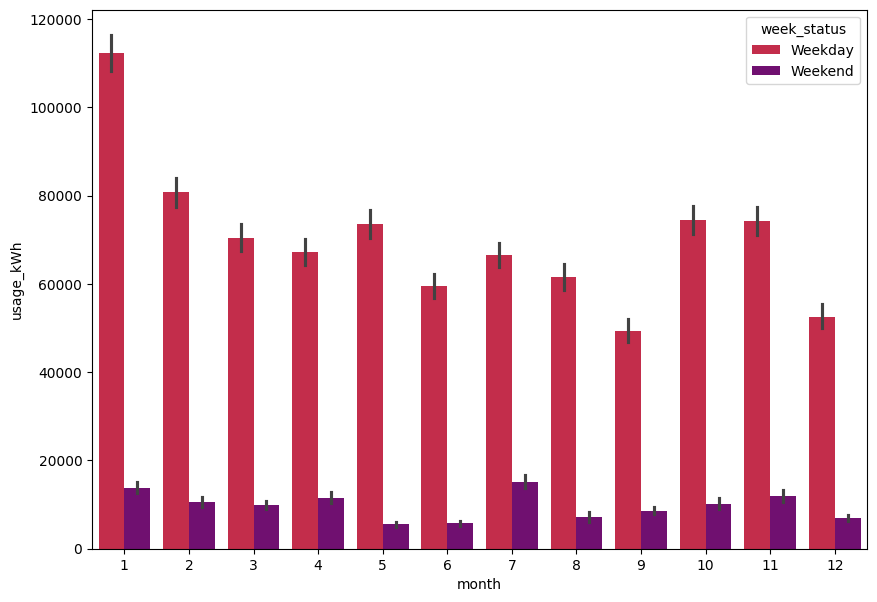

In [28]:
# Checking which months have the highest/lowest usage of electricity
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x='month', y='usage_kWh', palette={'Weekday':'crimson', 'Weekend':'purple'}, hue='week_status', estimator=np.sum)
plt.show()

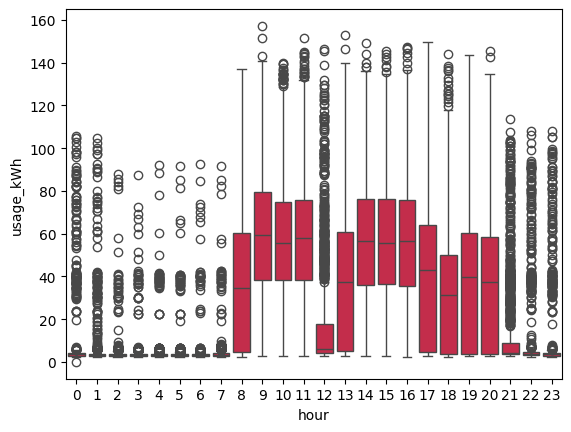

In [29]:
# Check for the distribution first to see if we will use median or mean
sns.boxplot(data=df, y='usage_kWh', x='hour', color='crimson')
plt.show()

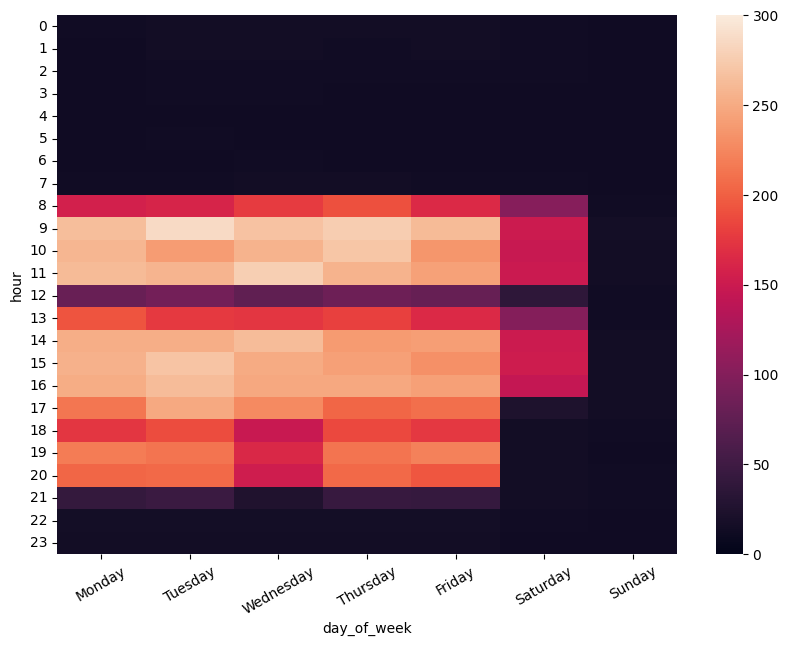

In [30]:
# Plotting usage_kWh vs. hour and day_of_week
plt.figure(figsize=(10, 7))
df_piv = df.pivot_table(index='hour', columns='day_of_week', values='hourly_usage_kWh', aggfunc='median')
df_piv = df_piv[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
sns.heatmap(data=df_piv, vmin=0, vmax=300)
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.show()

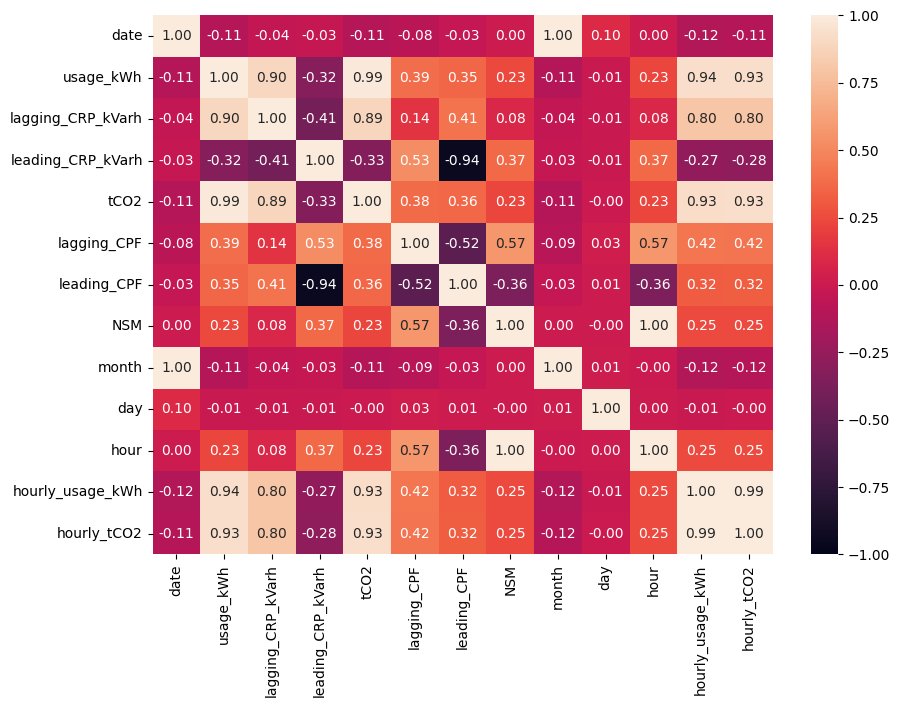

In [31]:
# Checking the linear correlation of numerical variables
df_num = df.drop(['week_status', 'day_of_week', 'load_type'], axis=1)
df_corr = df_num.corr()
plt.figure(figsize=(10, 7))
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(data=df_corr, annot=True, annot_kws={"size": 10}, fmt='.2f', vmin=-1, vmax=1)
plt.show()

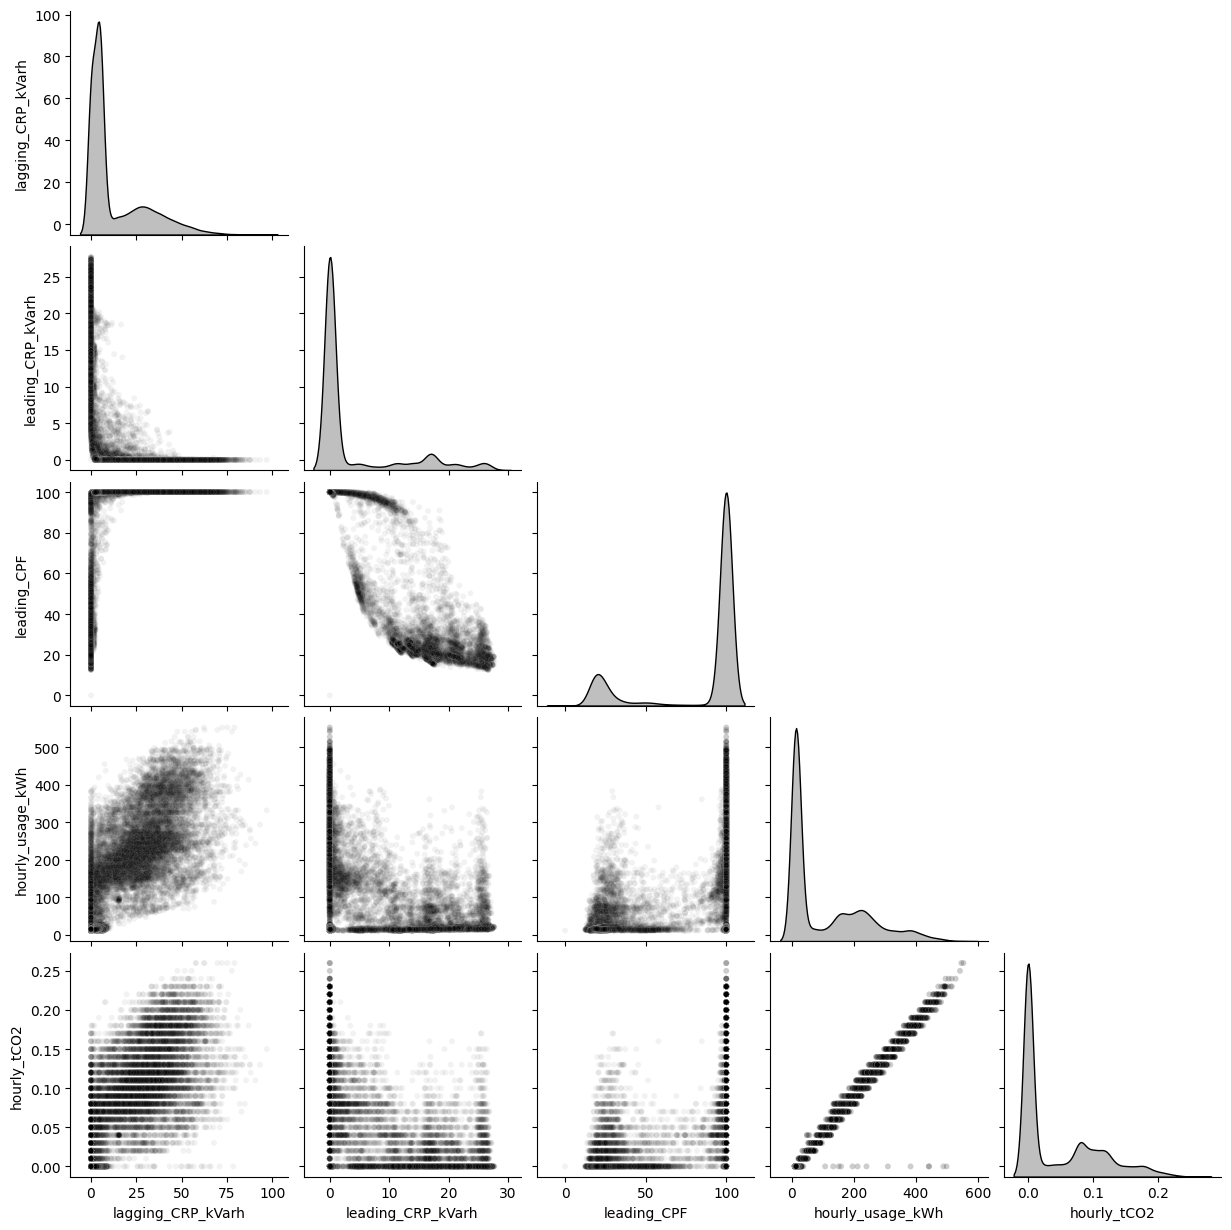

In [32]:
# Checking the scatter plot shapes of these variables
g = sns.pairplot(data=df_num[['lagging_CRP_kVarh', 'leading_CRP_kVarh', 'leading_CPF', 'hourly_usage_kWh', 'hourly_tCO2']], plot_kws={'color':'black', 'size':15, 'alpha':0.05}, diag_kws={'color':'black'}, diag_kind='kde', corner=False)
n = len(g.axes)

for i in range(n):
    for j in range(i + 1, n):
        g.axes[i, j].set_visible(False)

plt.show()